In [1]:
from fontpreview import FontPreview
import numpy as np
import matplotlib.pyplot as plt
import cv2

# BIDOUILLE SALE!! pour importer des fichiers qui ne sont pas dans le meme repertoire. les fichiers devront être rangés par la suite
import sys
sys.path.insert(1, '../')

import ressources as rss


In [2]:
# initialisation des variables globales
rss.init()

In [18]:



#Generation d'un mot aléatoire
def gen_word():
    nb_letters = np.random.randint(2, 20)
    font_size = np.random.randint(75, 150)
    # coeff sur la taille
    size_coeff = np.random.randint(1, 30) / 100
    height = 70
    
    word = ''
    for i in range(0, nb_letters-1):
        random_letter = rss.charList[np.random.randint(0, len(rss.charList)-1)]
        random_letter = random_letter.strip().lower()
        word = word + random_letter

    fpp = FontPreview('CollectionNewStyle.ttf') 
    fpp.font_text = str(word)
    # fp.bg_color = (253, 194, 45)        # background color. RGB color: yellow
    fpp.dimension = (15*nb_letters, int(height + height*size_coeff))           # specify dimension in pixel: 300 x 250
    # fp.fg_color = (51, 153, 193)        # foreground or font color. RGB color: blue
    fpp.set_font_size(int(font_size + font_size*size_coeff))       
    fpp.set_text_position('center')        
    # before saving the image, you need to draw it
    fpp.draw()
    
    filename = ''.join(e for e in word if e.isalnum())   # pour que le nom de fichier soit valide 
    # print('word_images/' + filename + '.png')
    fpp.save('word_images/' + filename + '.png')




In [4]:
import glob  # pour la fonction get_files()

# parcours de tous les fichiers d'un dossier et ses sous-dossiers, possibilité de spécifier une extension et la recherche parmis les sous dossiers
def get_files(path, ext='', sub=False):
    if sub == True:
        path = path + '/**'     
    if ext != '':
        path = path + '/*.' + ext
    else:
        path = path + '/*.*'  # le . filtre les dossiers  
    files = glob.glob(path, recursive=sub)
    return files

In [19]:

for i in range(0,50):
    gen_word()

49


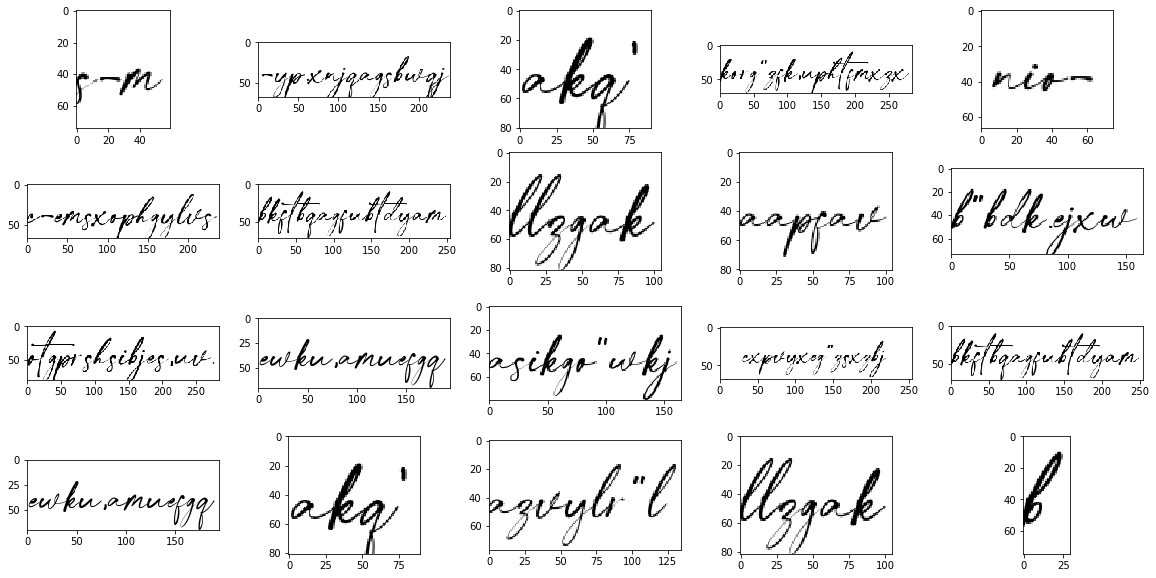

In [20]:
# Affichage des mots
from matplotlib import cm

all_files = get_files('word_images', ext='png', sub=False)
print(len(all_files))


j = 1
plt.figure(figsize=(20, 10))
for i in np.random.choice(len(all_files), size = 20):
    img = cv2.imread(all_files[i]) 
    # img = img.reshape(32, 128)
    
    plt.subplot(4, 5, j)
    j = j + 1
    plt.axis('on')
    plt.imshow(img, cmap=cm.binary, interpolation='None')
    # plt.title('True Label: ' + str(y_test[i]) \
    #         + '\n' + 'Prediction: '+ str(predicted_transcriptions[i])) #\